### Importação dos dados



In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja3.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,Pedro Gomes,BA,4,cartao_credito,6,-13.29,-41.71
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,Bianca Santos,SP,1,cartao_credito,1,-22.19,-48.79


#1. Análise do faturamento



,Loja,Vendas Totais
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


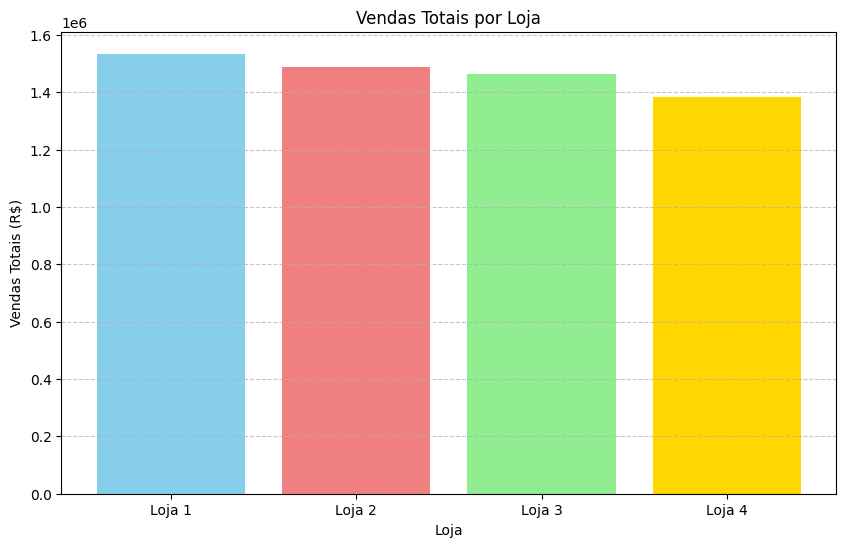

In [13]:
import matplotlib.pyplot as plt

vendas_loja1 = loja['Preço'].sum()
vendas_loja2 = loja2['Preço'].sum()
vendas_loja3 = loja3['Preço'].sum()
vendas_loja4 = loja4['Preço'].sum()

df_vendas_por_loja = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Vendas Totais': [vendas_loja1, vendas_loja2, vendas_loja3, vendas_loja4]
})

display(df_vendas_por_loja)

plt.figure(figsize=(10, 6))
plt.bar(df_vendas_por_loja['Loja'], df_vendas_por_loja['Vendas Totais'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Vendas Totais por Loja')
plt.xlabel('Loja')
plt.ylabel('Vendas Totais (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Vendas por Categoria

In [12]:
total_lojas = pd.concat([loja, loja2, loja3, loja4])
vendas_por_categoria = total_lojas.groupby('Categoria do Produto')['Preço'].sum().reset_index()
vendas_por_categoria = vendas_por_categoria.rename(columns={'Preço': 'Vendas Totais'})
display(vendas_por_categoria)


,Categoria do Produto,Vendas Totais
0,brinquedos,98140.86
1,eletrodomesticos,1766337.03
2,eletronicos,2214099.72
3,esporte e lazer,190635.39
4,instrumentos musicais,465029.67
5,livros,50260.74
6,moveis,1010214.00
7,utilidades domesticas,76773.38


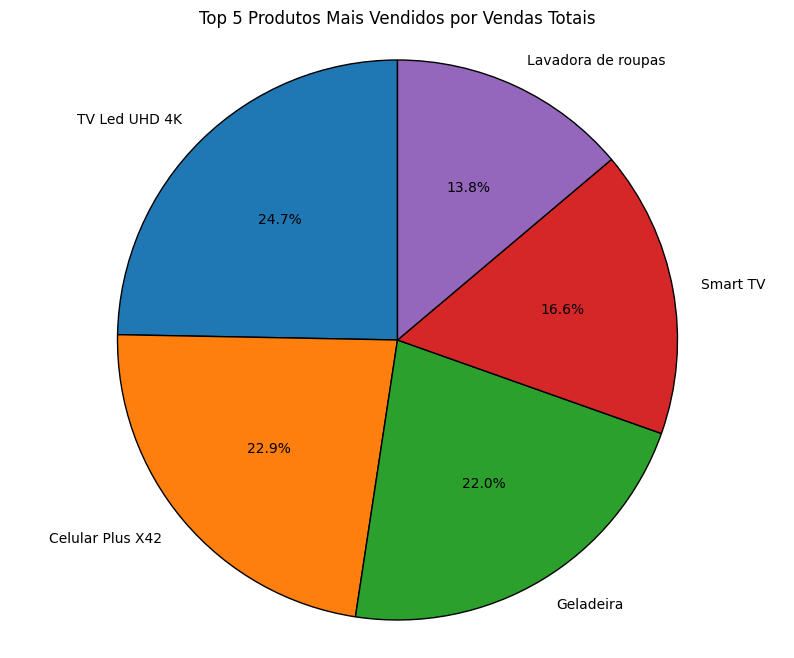

In [18]:
import matplotlib.pyplot as plt

# Assuming produtos_mais_vendidos DataFrame is already available from previous steps
# If not, the code to generate it should be run first.

# Prepare data for the pie chart
labels = produtos_mais_vendidos['Produto']
sizes = produtos_mais_vendidos['Vendas Totais']

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Top 5 Produtos Mais Vendidos por Vendas Totais')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 3. Média de Avaliação das Lojas


In [15]:
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

df_media_avaliacao_lojas = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média de Avaliação': [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
})

df_media_avaliacao_lojas['Média de Avaliação'] = df_media_avaliacao_lojas['Média de Avaliação'].round(2)

display(df_media_avaliacao_lojas)

,Loja,Média de Avaliação
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


# 4. Produtos Mais e Menos Vendidos

In [16]:

vendas_por_produto = total_lojas.groupby('Produto')['Preço'].sum().reset_index()
vendas_por_produto = vendas_por_produto.rename(columns={'Preço': 'Vendas Totais'})

produtos_mais_vendidos = vendas_por_produto.sort_values(by='Vendas Totais', ascending=False).head(5)

produtos_menos_vendidos = vendas_por_produto.sort_values(by='Vendas Totais', ascending=True).head(5)

print('Top 5 produtos mais vendidos:')
display(produtos_mais_vendidos)

print('\nTop 5 produtos menos vendidos:')
display(produtos_menos_vendidos)

Top 5 produtos mais vendidos:


,Produto,Vendas Totais
47,TV Led UHD 4K,576652.70
12,Celular Plus X42,534735.14
23,Geladeira,513249.34
44,Smart TV,386963.12
34,Lavadora de roupas,323292.37



Top 5 produtos menos vendidos:


,Produto,Vendas Totais
16,Cubo mágico 8x8,3638.68
15,Corda de pular,4090.93
19,Dinossauro Rex,4150.53
50,Xadrez de madeira,6865.90
29,Jogo de copos,7445.28


# 5. Frete Médio por Loja

In [17]:
media_frete_loja1 = loja['Frete'].mean()
media_frete_loja2 = loja2['Frete'].mean()
media_frete_loja3 = loja3['Frete'].mean()
media_frete_loja4 = loja4['Frete'].mean()

df_media_frete_lojas = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média Frete': [media_frete_loja1, media_frete_loja2, media_frete_loja3, media_frete_loja4]
})

display(df_media_frete_lojas)

,Loja,Média Frete
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997


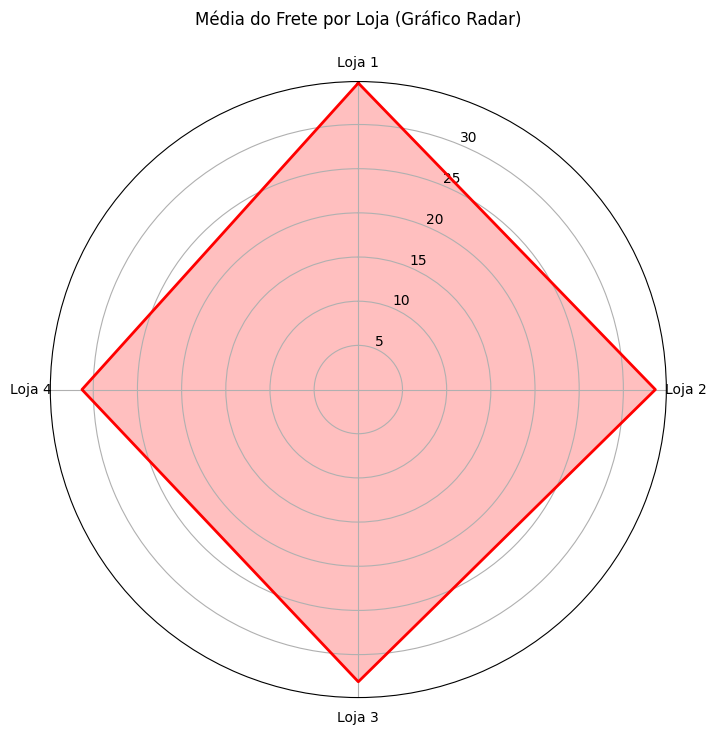

In [20]:
import matplotlib.pyplot as plt
import numpy as np


stores = df_media_frete_lojas['Loja'].tolist()
freight_values = df_media_frete_lojas['Média Frete'].tolist()


num_vars = len(stores)


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()


freight_values = freight_values + freight_values[:1]
angles = angles + angles[:1]


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, freight_values, color='red', alpha=0.25)
ax.plot(angles, freight_values, color='red', linewidth=2)


ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(stores)


ax.set_title('Média do Frete por Loja (Gráfico Radar)', y=1.08) # Adjust title position

plt.show()

# Relatório de Análise de Vendas e Logística

Este relatório compila as principais análises realizadas sobre os dados de vendas e operações das lojas.

## 1. Análise de Faturamento por Loja

Foi realizado o cálculo do faturamento total de cada loja, e os resultados foram visualizados em um gráfico de barras. Abaixo, a tabela com os valores:


In [21]:
display(df_vendas_por_loja)

,Loja,Vendas Totais
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


A Loja 1 apresentou o maior faturamento, enquanto a Loja 4 teve o menor. O gráfico de barras demonstra essa distribuição claramente.

## 2. Vendas Totais por Categoria de Produto

A seguir, a tabela das vendas totais agrupadas por categoria de produto:


In [22]:
display(vendas_por_categoria)

,Categoria do Produto,Vendas Totais
0,brinquedos,98140.86
1,eletrodomesticos,1766337.03
2,eletronicos,2214099.72
3,esporte e lazer,190635.39
4,instrumentos musicais,465029.67
5,livros,50260.74
6,moveis,1010214.00
7,utilidades domesticas,76773.38


As categorias 'eletrônicos' e 'eletrodomésticos' são as que mais contribuem para o faturamento total.

## 3. Média de Avaliação das Lojas

Calculamos a média das avaliações de compra para cada loja, arredondadas para duas casas decimais:


In [23]:
display(df_media_avaliacao_lojas)

,Loja,Média de Avaliação
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


A Loja 3 se destaca com a maior média de avaliação, enquanto a Loja 1 possui a menor.

## 4. Produtos Mais e Menos Vendidos

Identificamos os 5 produtos com maior volume de vendas e os 5 com menor volume. Estes dados foram visualizados em um gráfico de pizza para os mais vendidos. Abaixo, as tabelas:


In [24]:
print('Top 5 produtos mais vendidos:')
display(produtos_mais_vendidos)

print('\nTop 5 produtos menos vendidos:')
display(produtos_menos_vendidos)

Top 5 produtos mais vendidos:


,Produto,Vendas Totais
47,TV Led UHD 4K,576652.70
12,Celular Plus X42,534735.14
23,Geladeira,513249.34
44,Smart TV,386963.12
34,Lavadora de roupas,323292.37



Top 5 produtos menos vendidos:


,Produto,Vendas Totais
16,Cubo mágico 8x8,3638.68
15,Corda de pular,4090.93
19,Dinossauro Rex,4150.53
50,Xadrez de madeira,6865.90
29,Jogo de copos,7445.28


O gráfico de pizza (anteriormente gerado) ilustra a proporção de vendas desses produtos mais vendidos. Produtos eletrônicos e eletrodomésticos de alto valor dominam a lista dos mais vendidos.

## 5. Frete Médio por Loja

Por fim, calculamos o custo médio do frete para cada loja, e os resultados foram visualizados em um gráfico radar.


In [25]:
display(df_media_frete_lojas)

,Loja,Média Frete
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997


O gráfico radar (anteriormente gerado) permite uma comparação visual rápida dos custos médios de frete entre as lojas, mostrando que a Loja 4 tem o menor custo e a Loja 1 o maior.